In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
# Step1:- Load the files
movies= pd.read_csv('/content/movies_metadata.csv')
ratings= pd.read_csv('/content/ratings (1).csv')


<ipython-input-17-5e309e7b62e7>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies= pd.read_csv('/content/movies_metadata.csv')


In [ ]:
movies.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies.describe()
ratings.describe()


,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


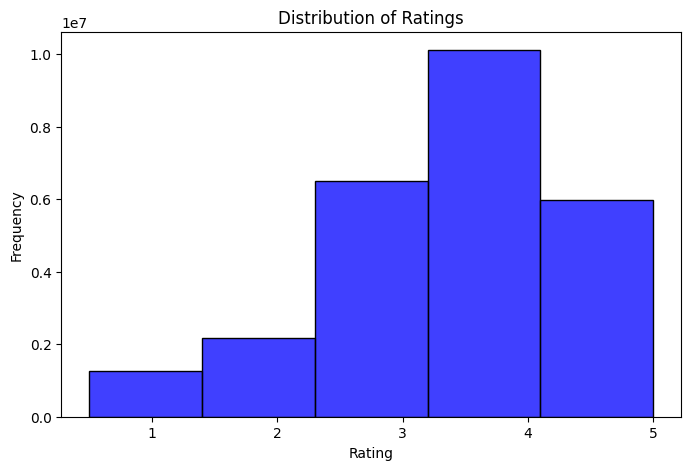

In [ ]:
# Step 2: EDA - Exploratory Data Analysis

# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=5, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-b8ef262d8e3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_movies.index, y=top_rated_movies.values, palette='viridis')


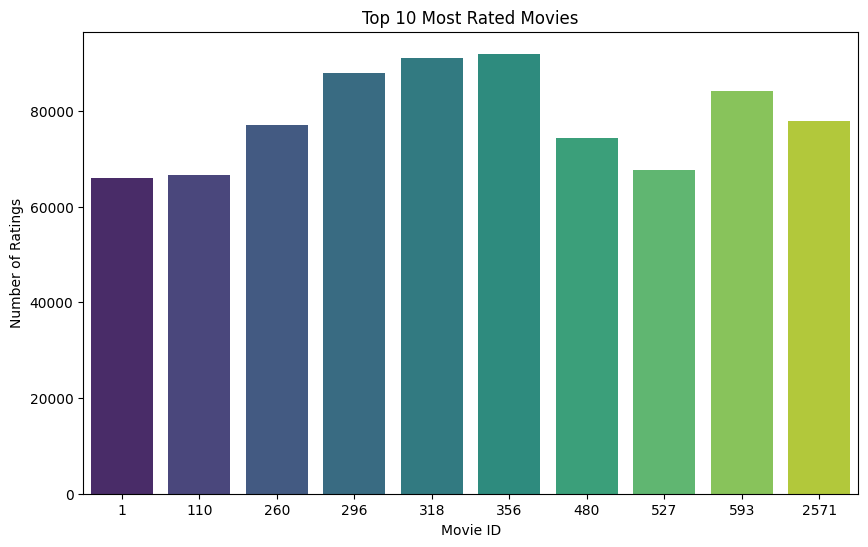

In [ ]:
# Number of ratings per movie (most rated movies)
rating_counts = ratings.groupby('movieId')['rating'].count()
top_rated_movies = rating_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies.index, y=top_rated_movies.values, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.show()

<ipython-input-25-e9763dff1834>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette='coolwarm')


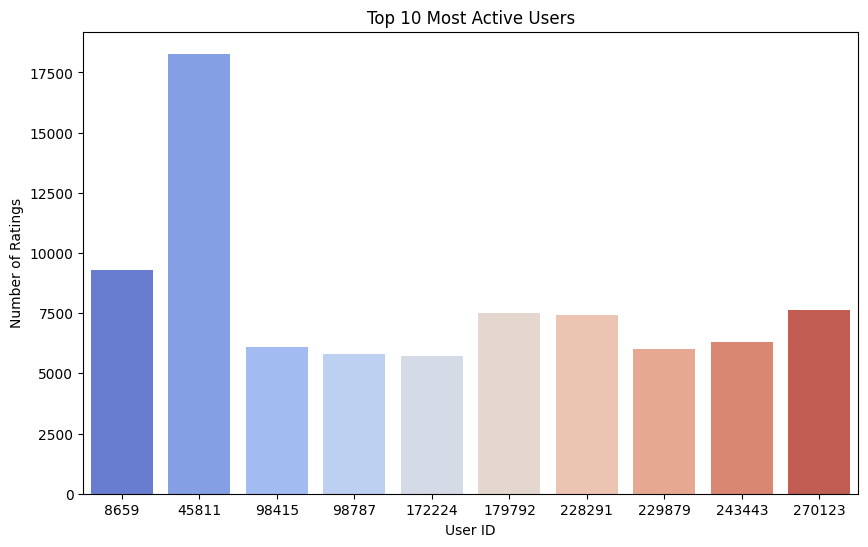

In [ ]:
# Number of ratings per user (most active users)
user_rating_counts = ratings.groupby('userId')['rating'].count()
top_users = user_rating_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette='coolwarm')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

In [ ]:
# Step 3: Preprocessing Data
# Merge movie details with ratings
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movie_data = pd.merge(ratings, movies[['id', 'title']], left_on='movieId', right_on='id', how='left')

In [ ]:
# Clean up and drop missing values
movie_data = movie_data.dropna(subset=['rating'])

In [ ]:
# Step 4: Create User-Item Rating Matrix
user_movie_ratings = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_ratings = user_movie_ratings.fillna(0)

In [ ]:
# Step 5: Calculate Cosine Similarity Matrix
cosine_sim = cosine_similarity(user_movie_ratings.T)  # Transpose to get item-item similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_movie_ratings.columns, columns=user_movie_ratings.columns)

In [ ]:
# Step 6: Recommendation Function
def get_movie_recommendations(movie_title, cosine_sim_df, top_n=10):
    if movie_title not in cosine_sim_df.index:
        return f"Movie '{movie_title}' not found in dataset."

    sim_scores = cosine_sim_df[movie_title].sort_values(ascending=False)
    recommended_movies = sim_scores.iloc[1:top_n+1]  # Exclude the movie itself
    return recommended_movies


In [ ]:
# Example: Get movie recommendations for a specific movie
movie_to_recommend = 'The Dark Knight'
top_recommendations = get_movie_recommendations(movie_to_recommend, cosine_sim_df)
print(f"Top 10 recommendations for '{movie_to_recommend}':")
print(top_recommendations)

Top 10 recommendations for 'The Dark Knight':
title
Breakfast at Tiffany's    0.173641
Strange Days              0.164294
Bride of Frankenstein     0.162928
Batman Begins             0.158721
Desert Hearts             0.157506
Wings of Desire           0.157377
The War of the Roses      0.155392
Catwoman                  0.154588
Amadeus                   0.151615
Maybe... Maybe Not        0.150833
Name: The Dark Knight, dtype: float64


In [ ]:
# Step 7: Model Prediction - Predicting the Rating for a Movie by a User
def predict_rating(user_id, movie_title, user_movie_ratings, cosine_sim_df):
    if movie_title not in user_movie_ratings.columns:
        return "Movie not found in dataset."

      # Get the user's ratings
    user_ratings = user_movie_ratings.loc[user_id]

    # Get the similarity scores for the movie
    movie_similarities = cosine_sim_df[movie_title]

    # Predict the rating as a weighted average of similar movie ratings
    weighted_ratings = user_ratings * movie_similarities
    predicted_rating = weighted_ratings.sum() / movie_similarities.sum()

    return predicted_rating

In [ ]:
 # Example: Predict rating for user 1 and 'The Dark Knight'
predicted_rating = predict_rating(user_id=1, movie_title='The Dark Knight',
                                  user_movie_ratings=user_movie_ratings,
                                  cosine_sim_df=cosine_sim_df)
print(f"Predicted rating for User 1 on 'The Dark Knight': {predicted_rating:.2f}")

Predicted rating for User 1 on 'The Dark Knight': 0.01


In [ ]:
# Step 8: Save the Model (for deployment)
with open('movie_recommender_model.pkl', 'wb') as f:
    pickle.dump(cosine_sim_df, f)
    pickle.dump(user_movie_ratings, f)

In [ ]:
# Step 9: Load the Model (for future use)
with open('movie_recommender_model.pkl', 'rb') as f:
    loaded_cosine_sim_df = pickle.load(f)
    loaded_user_movie_ratings = pickle.load(f)

In [ ]:
# Example: Recommend movies after loading the model
loaded_recommendations = get_movie_recommendations(movie_to_recommend, loaded_cosine_sim_df)
print(f"Top 10 recommendations (loaded model) for '{movie_to_recommend}':")
print(loaded_recommendations)


Top 10 recommendations (loaded model) for 'The Dark Knight':
title
Breakfast at Tiffany's    0.173641
Strange Days              0.164294
Bride of Frankenstein     0.162928
Batman Begins             0.158721
Desert Hearts             0.157506
Wings of Desire           0.157377
The War of the Roses      0.155392
Catwoman                  0.154588
Amadeus                   0.151615
Maybe... Maybe Not        0.150833
Name: The Dark Knight, dtype: float64
